This notebook shows how to load contrast data and perform a simple calibration.

We load contrast data and fit the calibration function:

contrast = f(mass) = mass*slope + intercept

In [1]:
from pyphotomol import (
    PyPhotoMol,
    plot_histogram,
    plot_histograms_and_fits,
    plot_calibration,
    PlotConfig
)
from scripts import display_figure_static  # Only for static display, to be shown in GitHub

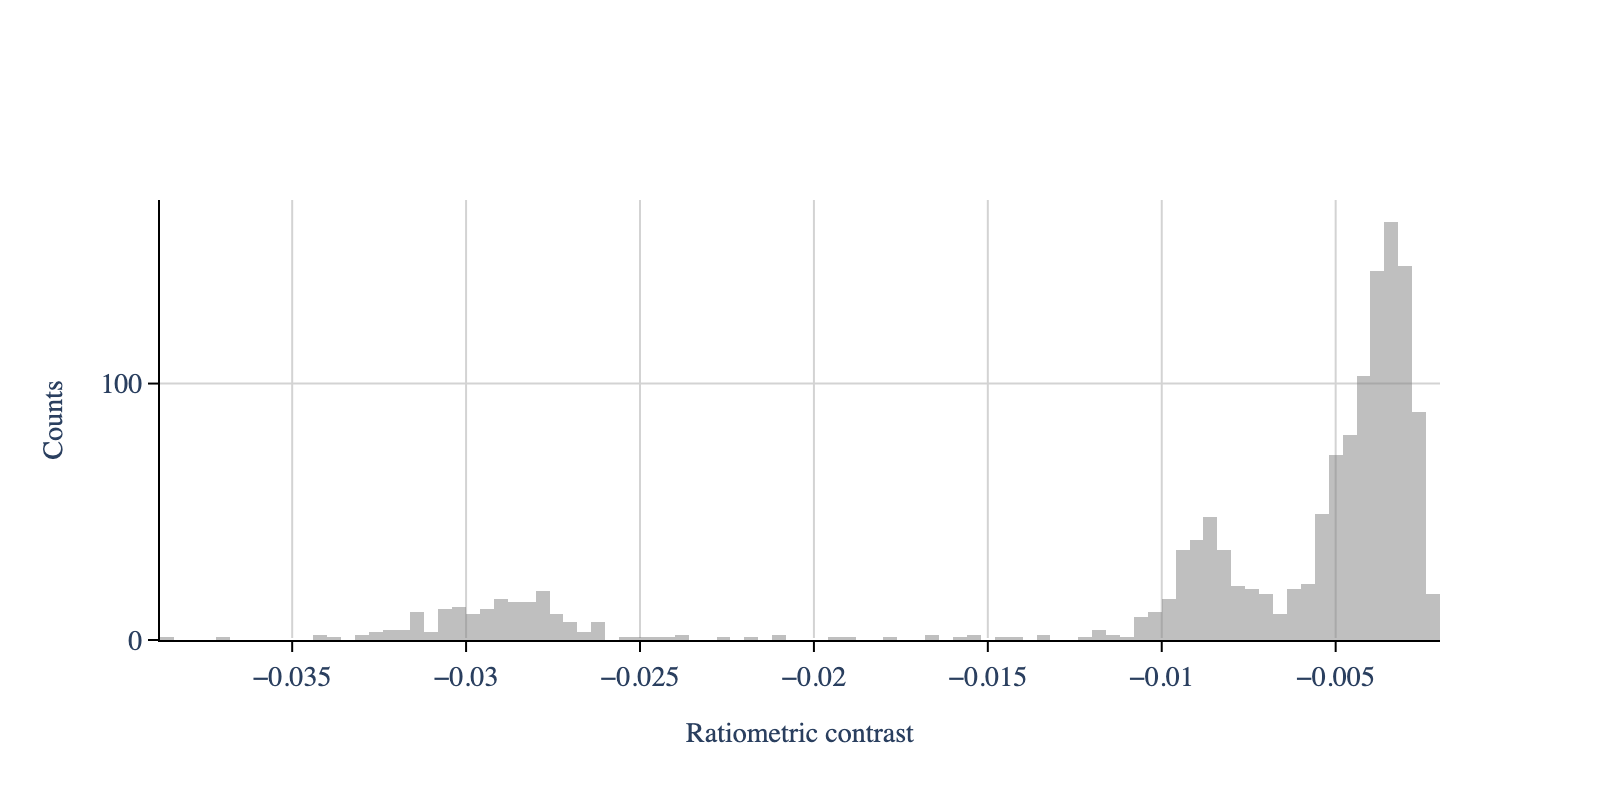

In [2]:
file = '../test_files/contrasts.csv'

# Create an instance of PyPhotoMol
# One instance of a PyPhotoMol class can handle one file at a time
photomol = PyPhotoMol() 

# Import the file
photomol.import_file(file)

photomol.create_histogram(use_masses=False, window=[-0.04, 0], bin_width=0.0004)

colors_hist = ['gray']

# Create configuration object for contrast plotting
plot_config = PlotConfig(contrasts=True)

fig = plot_histogram(photomol, 
                     colors_hist=colors_hist, 
                     plot_config=plot_config)
display_figure_static(fig, height=400)

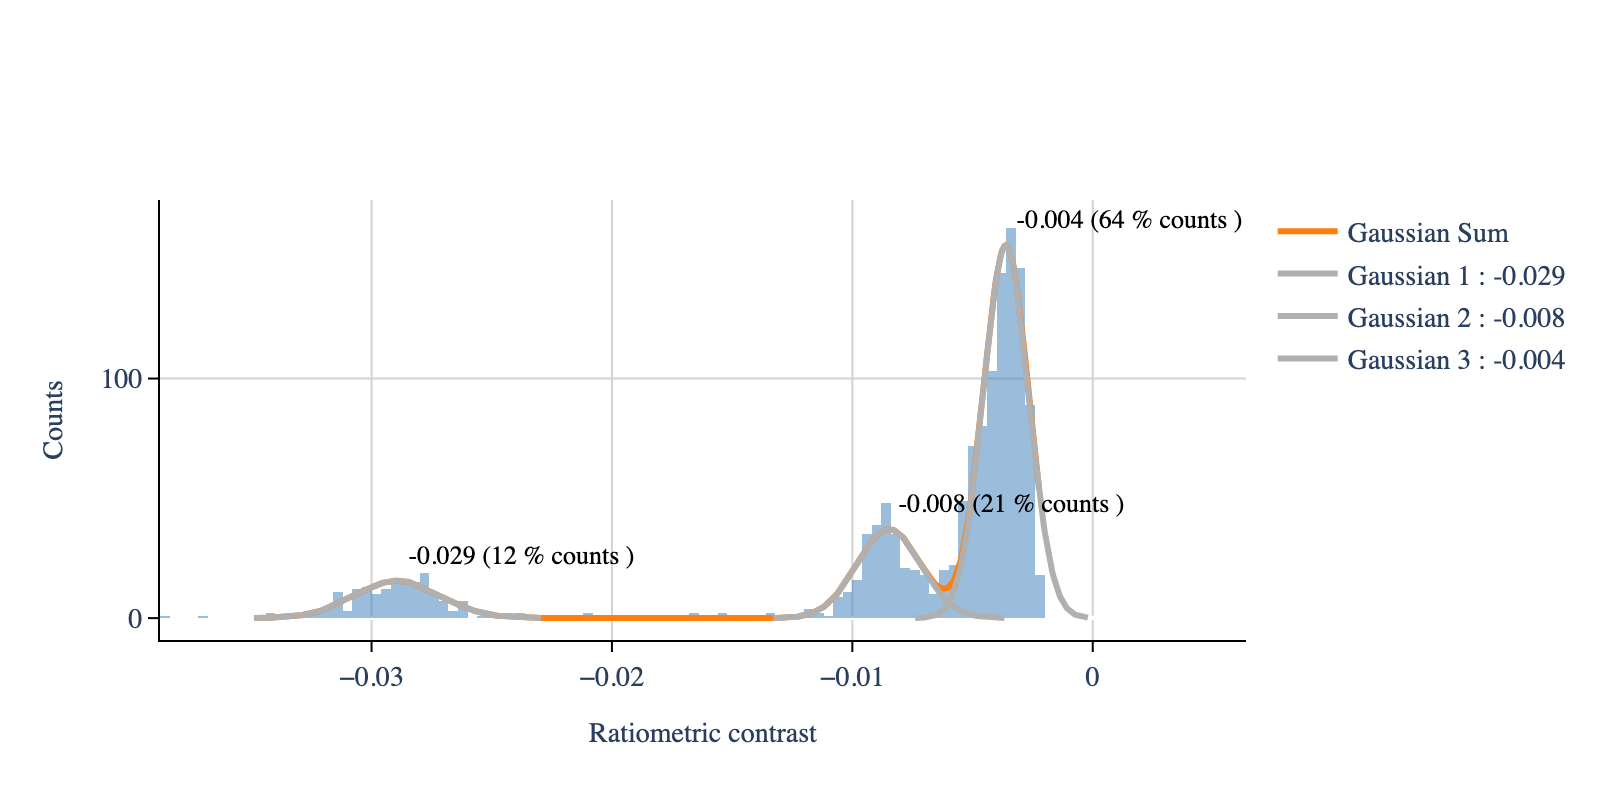

In [3]:
# Fit the multigaussian model
initial_peak_guess = [-0.03, -0.01, -0.005]

photomol.fit_histogram(mean_tolerance=0.1,  # Each mean will be within 0.1 of the initial guess
                       peaks_guess=initial_peak_guess,  # Initial guess for the peaks
                       std_tolerance=0.1,  # Each standard deviation will be lower than 0.1
                       threshold=-0.0022,  # Maximum observed contrast
                       baseline=0)  # Baseline value for the fit, useful to correct for background noise

# Plot the histogram and the fit
# Create configuration object for contrast plotting
plot_config = PlotConfig(contrasts=True)

fig = plot_histograms_and_fits(photomol, 
                               plot_config=plot_config)

display_figure_static(fig, height=400)

Slope: -6.115911272669366e-05
Intercept: 0.0004374498828378568
R-squared: 0.9999993694482743


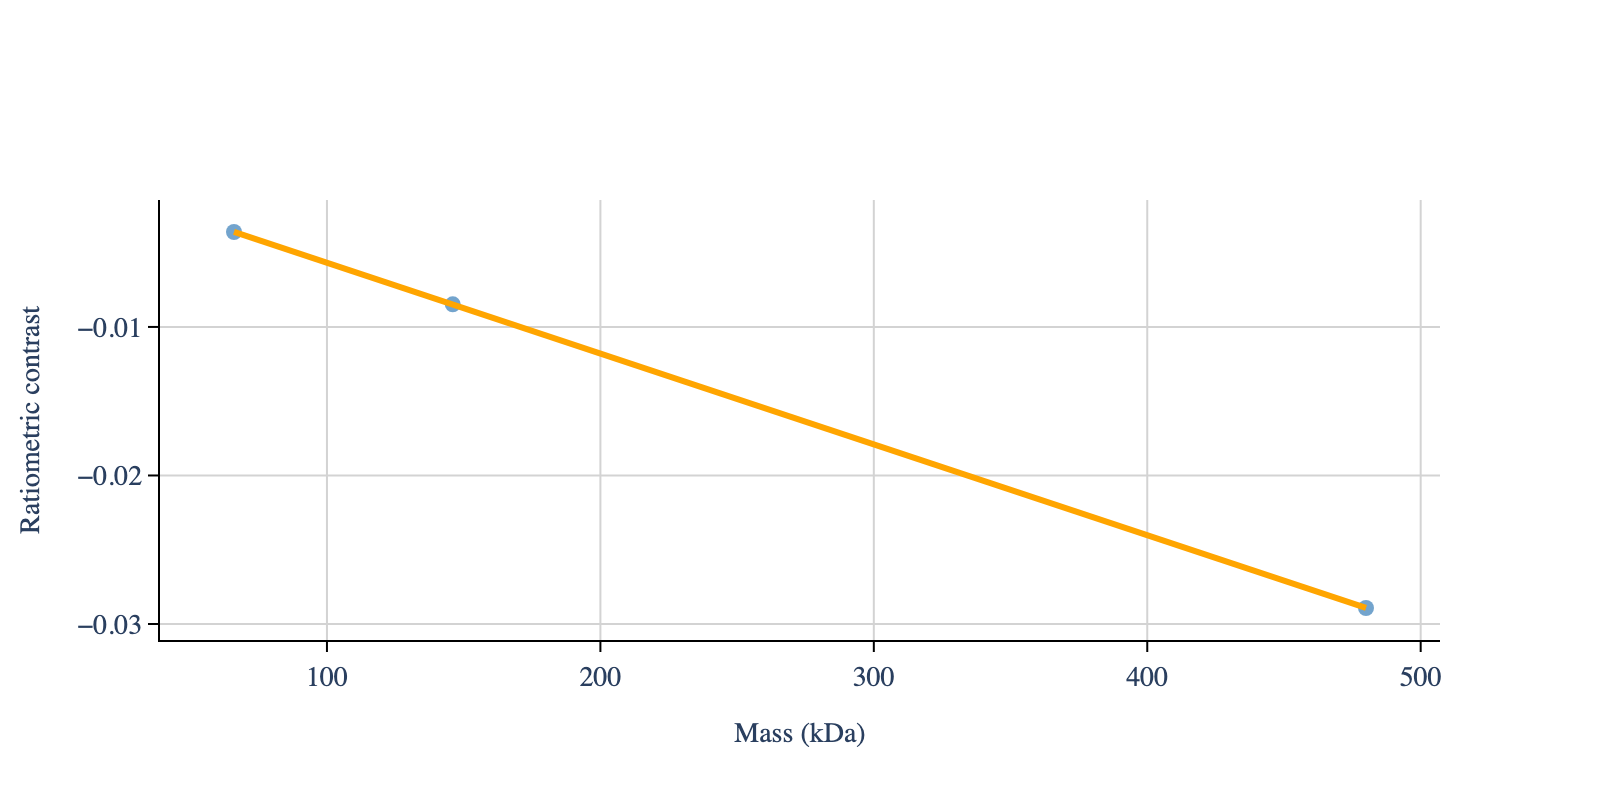

In [4]:
known_standards = [480, 146, 66]  # Known standards in kDa

# Perform calibration
photomol.calibrate(calibration_standards=known_standards)

# Print the slope and intercept of the calibration - 
print(f"Slope: {photomol.calibration_dic['fit_params'][0]}")
print(f"Intercept: {photomol.calibration_dic['fit_params'][1]}")

# The calibration function is defined as: contrast = f(mass) = slope * mass + intercept

# Print the R-squared value of the calibration
print(f"R-squared: {photomol.calibration_dic['fit_r2']}")

# Plot the calibration
fig = plot_calibration(
    mass=known_standards,
    contrast=photomol.calibration_dic['exp_points'],
    slope=photomol.calibration_dic['fit_params'][0],
    intercept=photomol.calibration_dic['fit_params'][1])

display_figure_static(fig,height=400)